In [44]:
import pandas as pd

# Excel 파일 읽기
df = pd.read_csv('C:/Users/82106/Desktop/디지털화의 경제 영향도/데이터/processed_digitalization_data.csv')

df.head()

,Country,id,Year,INCOME,LGDP,FPS,MPS,BBS,IU,DDI,GFCF,TO,Labor,LCPI,LPOP,CONSUM,RD
0,Pays Bas,1,2000,1,10.607994,0.620927,0.675303,0.016325,0.439844,0.39172,0.225702,1.255219,1.27381,4.406078,16.583433,0.364773,0.017898
1,Pays Bas,1,2001,1,10.623448,0.509298,0.685303,0.026325,0.449844,0.26795,0.235702,1.275219,1.28668,4.446796,16.590981,0.369977,0.017961
2,Pays Bas,1,2002,1,10.619236,0.498189,0.695303,0.036325,0.459844,0.29133,0.245702,1.295219,1.30062,4.479143,16.597364,0.372896,0.017454
3,Pays Bas,1,2003,1,10.616073,0.484293,0.705303,0.046325,0.469844,0.31063,0.255702,1.315219,1.29774,4.499847,16.602082,0.382046,0.017839
4,Pays Bas,1,2004,1,10.632253,0.482649,0.715303,0.056325,0.479844,0.34787,0.265702,1.335219,1.30060,4.512404,16.605557,0.374042,0.017890


In [45]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [46]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# 디지털화 관련 변수들 정의
digital_vars = {
    'DDI': '디지털화 종합 지표',
    'FPS': '유선전화 가입자 수',
    'MPS': '모바일 가입자 수',
    'BBS': '브로드밴드(초고속인터넷) 가입자 수',
    'IU': '인터넷 사용률'
}

In [52]:
# 경제 변수들 정의
economic_vars = {
    'LGDP': '로그 GDP',
    'GFCF': '총고정자본형성',
    'TO': '무역개방도',
    'Labor': '노동력',
    'LCPI': '소비자물가지수',
    'CONSUM': '정부소비',
    'RD': '연구개발비'
}

### 상관관계 분석

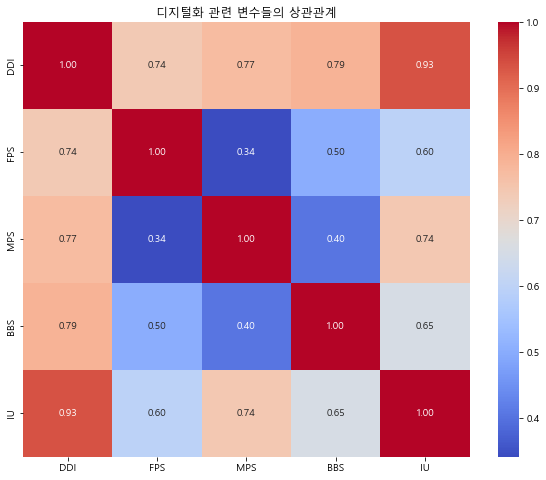

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[digital_vars.keys()].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f')
plt.title('디지털화 관련 변수들의 상관관계')
plt.show()

- 디지털화와 여러 디지털 변수들은 아주 높은 상관관계 (0.7 이상)

In [54]:
#2. 상관관계 분석을 위한 변수 결합
analysis_vars = list(digital_vars.keys()) + list(economic_vars.keys())

c:\Users\82106\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82106\AppData\Local\Temp\ipykernel_23620\3685092637.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


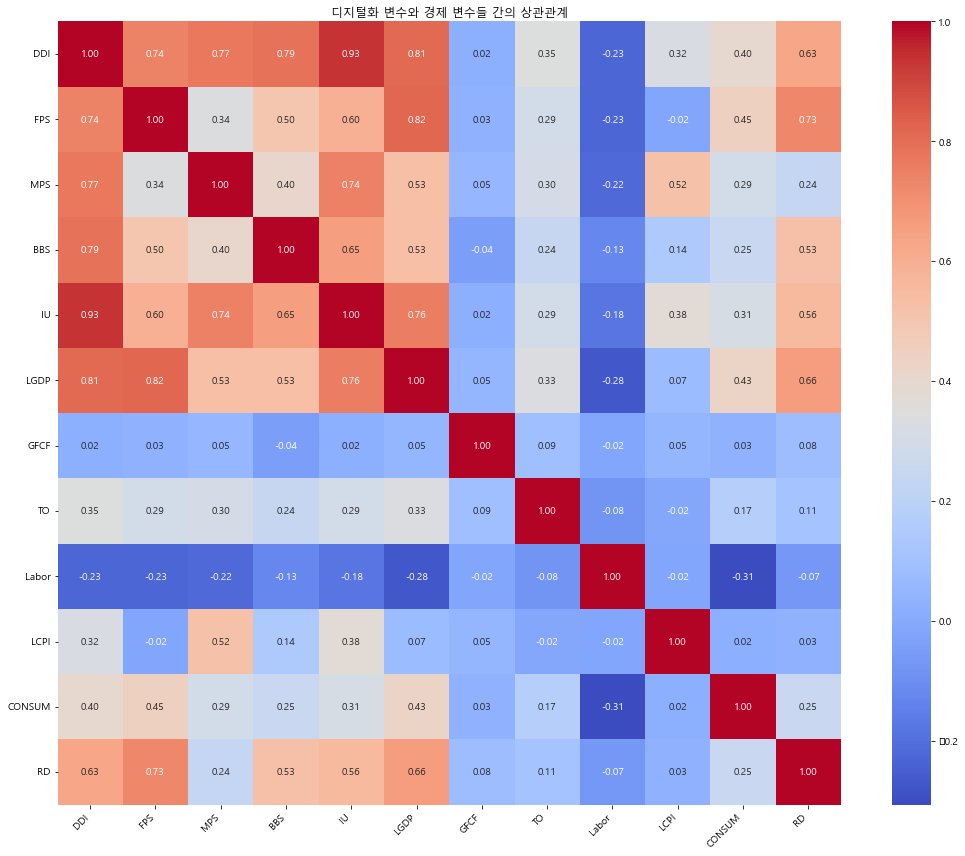

In [55]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[analysis_vars].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            square=True)
plt.title('디지털화 변수와 경제 변수들 간의 상관관계')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- 눈에 띄는 관계는 디지털화 지수와 노동력 사이의 관계이다.
- 디지털화 지수가 높아질수록 노동력은 감소하는 경향을 보인다.
- 이는 디지털화가 높아질수록 노동 효율성이 증가하기때문으로 보인다.

- 연구개발비 투자가 높을수록 디지털화 지수가 높다.

**결과적으로 연구개발비가 증가하면 디지털화가 증가하고 이는 노동력 효율성을 올려줘 노동력 지수를 감소시키며 결국 GDP가 성장하는 인과관계를 유추해낼수있다.**

In [10]:
# 종속변수
y = df['Labor (Hlabor+Flabor)']

# 독립변수
X = df[['DDI', 'FPS', 'MPS', 'BBS', 'IU', 'LGDP', 'GFCF', 'TO', 
        'LCPI', 'LPOP', 'CONSUM', 'RD']]

c:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


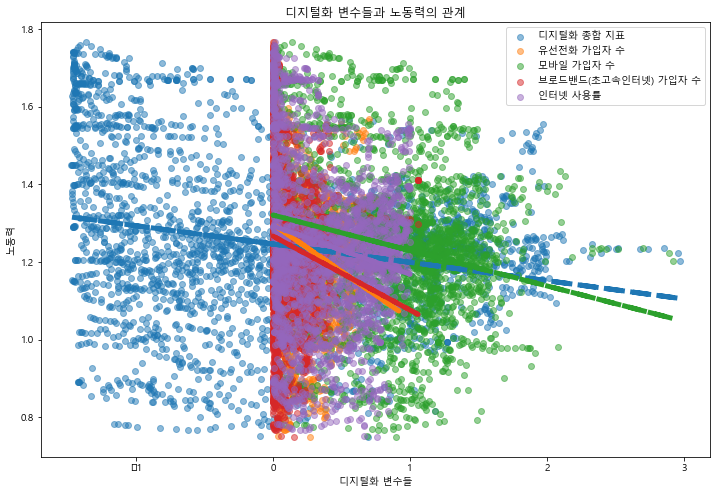

In [11]:
# 시각화
plt.figure(figsize=(12, 8))
for var in digital_vars.keys():
    plt.scatter(df[var], y, alpha=0.5, label=digital_vars[var])

plt.xlabel('디지털화 변수들')
plt.ylabel('노동력')
plt.title('디지털화 변수들과 노동력의 관계')

# 각 변수별로 회귀선 추가
for var in digital_vars.keys():
    z = np.polyfit(df[var], y, 1)
    p = np.poly1d(z)
    plt.plot(df[var], p(df[var]), linestyle='--', alpha=1.0, linewidth=5)

plt.legend()
plt.show()

*디지털화가 진행되면 노동력이 감소하는 추세를 확인할 수 있다.*

### GDP와 변수들간의 회귀분석

#### OLS 모델

In [42]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
# 종속변수
y = df['LGDP']

# 독립변수
X = df[['DDI', 'GFCF', 'TO', 'Labor', 'LCPI', 'LPOP', 'CONSUM', 'RD']]

# 변수 표준화
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# OLS 회귀분석 실행
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   LGDP   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     978.1
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:33:55   Log-Likelihood:                -3088.8
No. Observations:                2730   AIC:                             6196.
Df Residuals:                    2721   BIC:                             6249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.67

### **OLS 회귀 결과 요약**

| **변수**            | **계수 (coef)** | **P-값 (p-value)** |
|---------------------|----------------|--------------------|
| **DDI**             | +0.946         | 0.000              |
| **GFCF**            | +0.029         | 0.048              |
| **TO**              | +0.059         | 0.000              |
| **Labor**           | -0.127         | 0.000              |
| **LCPI**            | -0.210         | 0.000              |
| **LPOP**            | -0.078         | 0.000              |
| **CONSUM**          | +0.101         | 0.000              |
| **RD**              | +0.347         | 0.000              |


### 변수별 LGDP와의 관계 설명

#### 1. **DDI**  
- **LGDP는 DDI가 1 단위 증가할 때 평균적으로 0.9606 증가**합니다.  
- 이는 DDI가 경제 규모에 긍정적인 영향을 미친다는 것을 의미합니다.

#### 2. **TO**  
- **LGDP는 TO가 1 단위 증가할 때 평균적으로 0.1543 증가**합니다.  
- 이는 무역 개방도가 경제 규모에 긍정적인 영향을 준다는 것을 나타냅니다.

#### 3. **CONSUM**  
- **LGDP는 CONSUM이 1 단위 증가할 때 평균적으로 0.8593 증가**합니다.  
- 이는 소비가 경제 규모를 크게 증가시키는 주요 요인임을 보여줍니다.

#### 4. **RD**  
- **LGDP는 RD가 1 단위 증가할 때 평균적으로 36.7289 증가**합니다.  
- 이는 연구개발(R&D)이 경제 규모에 매우 강력하고 긍정적인 영향을 미친다는 것을 강조합니다.


### 디지털화와 노동력 간의 회귀분석

#### OLS 모델

In [13]:
#회귀분석 실행
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [14]:
# 4. 이분산성 검정
from statsmodels.stats.diagnostic import het_breuschpagan

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Labor (Hlabor+Flabor)   R-squared:                       0.150
Model:                               OLS   Adj. R-squared:                  0.147
Method:                    Least Squares   F-statistic:                     40.07
Date:                   Sat, 28 Dec 2024   Prob (F-statistic):           2.19e-87
Time:                           15:35:31   Log-Likelihood:                 666.29
No. Observations:                   2730   AIC:                            -1307.
Df Residuals:                       2717   BIC:                            -1230.
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        476.7334 

#### GLM 모델

In [28]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 종속변수
y = df['Labor']

# 독립변수
X = df[['DDI', 'FPS', 'MPS', 'BBS', 'IU', 'LGDP', 'GFCF', 'TO', 
        'LCPI', 'LPOP', 'CONSUM', 'RD']]

In [18]:
# 변수 표준화
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
# GLM 모델 
X_scaled = sm.add_constant(X_scaled)
glm_model = sm.GLM(y, X_scaled, family=sm.families.Gaussian())
glm_results = glm_model.fit()

print(glm_results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Labor (Hlabor+Flabor)   No. Observations:                 2730
Model:                               GLM   Df Residuals:                     2717
Model Family:                   Gaussian   Df Model:                           12
Link Function:                  identity   Scale:                        0.036108
Method:                             IRLS   Log-Likelihood:                 666.29
Date:                   Sat, 28 Dec 2024   Deviance:                       98.107
Time:                           15:44:28   Pearson chi2:                     98.1
No. Iterations:                        3   Pseudo R-squ. (CS):             0.1615
Covariance Type:               nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2466 

다중공선성 문제를 해결하기위해 상관관계가 높은 변수중에서 대표변수만 선정 (디지털화 변수중 DDI 선정)

### 노동력과 변수들간의 OLS회귀분석 (높은 상관관계 변수 제외)

In [38]:
# 종속변수
y = df['Labor']

# 독립변수
X = df[['DDI', 'GFCF','TO','LPOP','LCPI','CONSUM']]

# 변수 표준화
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 회귀분석 실행
X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Labor (Hlabor+Flabor)   R-squared:                       0.109
Model:                               OLS   Adj. R-squared:                  0.107
Method:                    Least Squares   F-statistic:                     55.52
Date:                   Sat, 28 Dec 2024   Prob (F-statistic):           6.38e-65
Time:                           16:23:43   Log-Likelihood:                 601.39
No. Observations:                   2730   AIC:                            -1189.
Df Residuals:                       2723   BIC:                            -1147.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2466 

#### 1. **DDI (디지털화 지표)**
- **계수(coef): -0.0295**, **p-값: 0.000**
- **해석**: 
  - DDI가 1 단위 증가하면 Labor는 평균적으로 **0.0295 단위 감소**.  
  - 디지털화는 **자동화와 기술 혁신**을 통해 노동력 수요를 줄이는 경향이 있음.

#### 2. **CONSUM (정부 소비)**
- **계수(coef): -0.0520**, **p-값: 0.000**
- **해석**: 
  - CONSUM이 1 단위 증가하면 Labor는 평균적으로 **0.0520 단위 감소**.  
  - 정부 소비는 **기술 도입과 생산성 향상**으로 노동력 수요를 줄이는 데 영향을 미칠 가능성이 있음.

### 노동력과 변수들간의 GLM회귀분석 (높은 상관관계 변수 제외)

In [39]:
# 회귀분석 실행
X_scaled = sm.add_constant(X_scaled)
glm_model = sm.GLM(y, X_scaled, family=sm.families.Gaussian())
glm_results = glm_model.fit()

print(glm_results.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Labor (Hlabor+Flabor)   No. Observations:                 2730
Model:                               GLM   Df Residuals:                     2723
Model Family:                   Gaussian   Df Model:                            6
Link Function:                  identity   Scale:                        0.037783
Method:                             IRLS   Log-Likelihood:                 601.39
Date:                   Sat, 28 Dec 2024   Deviance:                       102.88
Time:                           16:23:44   Pearson chi2:                     103.
No. Iterations:                        3   Pseudo R-squ. (CS):             0.1149
Covariance Type:               nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2466 

### 변수중요도

In [40]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 특성 중요도 계산 및 시각화
feature_importance = pd.DataFrame({
    '변수': X.columns,
    '중요도': model.feature_importances_
})

print(feature_importance)

       변수       중요도
0     DDI  0.188683
1    GFCF  0.092931
2      TO  0.114130
3    LPOP  0.256895
4    LCPI  0.081153
5  CONSUM  0.266208


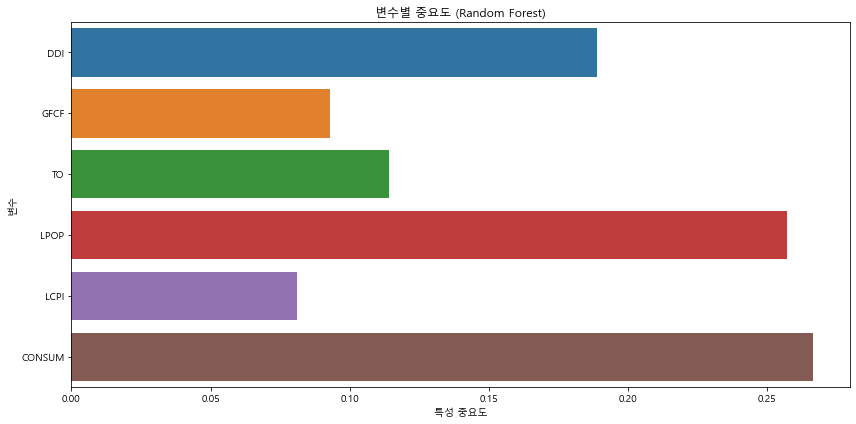

In [41]:
# 결과 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='변수', data=feature_importance)
plt.title('변수별 중요도 (Random Forest)')
plt.xlabel('특성 중요도')
plt.ylabel('변수')
plt.tight_layout()
plt.show()

- 가장 높은 중요도를 나타내는 3가지 변수는 정부지출, 인구, 디지털화 이다.

- 유의미성이 낮은 인구 변수를 제외하면 정부지출과 디지털화가 노동력 변수에 영향을 크게 주는것을 확인할수있다.

### 요약

- **디지털화 (Digitalization, DDI)**  
  - **해석**: DDI는 **자동화와 기술 혁신**을 통해 노동 수요를 줄이는 경향이 있습니다.  
  - **결과**: DDI가 1 단위 증가할 때 Labor는 **평균 0.0295 감소**.

- **정부 소비 (CONSUM)**  
  - **해석**: 정부 소비는 **기술 도입과 생산성 향상**으로 노동 수요를 감소시킬 수 있습니다.  
  - **결과**: CONSUM이 1 단위 증가할 때 Labor는 **평균 0.052 감소**.

- **가장 중요한 변수**  
  - **정부 지출**, **디지털화**, **인구**가 노동력 변수에 가장 큰 영향을 미치는 요인으로 나타났습니다.
  - 다만, **인구 변수는 유의미성이 낮아 제외**할 경우, **정부 지출과 디지털화**가 노동력 변수에 가장 큰 영향을 미치는 것으로 확인되었습니다.


**이렇게 노동력의 효율성을 올리면 노동력 감소가 되고 이는 GDP 상승으로 이어지는 것을 회귀분석으로 살펴볼 수 있다.**